In [ ]:
#imports
import experimentation as exp
experiment_runs = 10000

This part is MLS. It runs the FM local search 10.000 times.

In [6]:
from IPython.display import HTML
import pandas as pd
import time

#Run the multi start local search algorithm 10.000 times. The return value is a list of dictionaries.
#Each dictionary contains the results of one full FM run. 
#Each dictionary contains the following keys:
"""
"fm_runs": number of runs until convergence,
"run_times": a list of the run times of each run,
"total_elapsed": total time elapsed,
"average_elapsed": average time elapsed,
"cut_size": best cut size found,
"partition_1": a list of node ids in partition 1,
"partition_2": a list of node ids in partition 2,
"initial_cut_size": initial cut size
"""
start_time = time.time()
results = exp.run_mls(runs=experiment_runs)
end_time = time.time()

elapsed_time = end_time - start_time
print(f"Elapsed time: {elapsed_time:.2f} seconds to run {experiment_runs} experiments")

Elapsed time: 458.80 seconds to run 10000 experiments


In [8]:
summary = exp.summarize_results(results)

# Convert summary to DataFrame for better display
df = pd.DataFrame(list(summary.items()), columns=['Metric', 'Value'])
HTML(df.to_html(index=False))

Metric,Value
Total Runs,10000.000000
Average Runs,501.000000
Average Elapsed (full FM),0.044757
Stdev Elapsed (full FM),0.002826
Total Elapsed,447.565141
Average Cut Size,68.745800
Best Cut Size,29.000000
Worst Cut Size,118.000000
Average Initial Cut Size,642.225300
Best Initial Cut Size,560.000000


This is the section to find an optimum mutation size for the ILS. 
WARNING, it is not parallelized yet, it can take up to 15 hours!

In [10]:
import ils
import time

#Use the bisection search from the previous step to find the best mutation size for the ILS algorithm.
mutation_size_sequence = []
current = 10
lower_bound = current
max = 101
max_iterations = 10000
results = []
best_cut = 501
best_mutation_size = -1
tolerance = 2
n_worse_solutions = 0
step = 10

while current <= max:
    mutation_size_sequence.append(current)
    m_size = current      
    
    #Run the algorithm with the current mutation size 10 times.
    print("Running ILS with mutation size: ", m_size,". Trial: ", len(mutation_size_sequence))  
    start = time.time()
    best, avg_cut_size, results = ils.run_ils(mutation_size=m_size, max_iterations=max_iterations, runs=10)    
    time_elapsed = time.time() - start
    results.append((m_size, results))
    is_better_cut = avg_cut_size < best_cut
    
    if is_better_cut:
        best_cut = avg_cut_size
        best_mutation_size = m_size        
        n_worse_solutions = 0
    else:
        n_worse_solutions += 1 #If tolerance is not exceeded, we will keep exploring.
        
    print("Finished. Cut size: ", avg_cut_size, ". Is better: ", is_better_cut)
    print("Elapsed Time: ", time_elapsed)    
    print("--------------------------------------------")
    
    if n_worse_solutions > tolerance:
        print("Stopping. There is no improvement by incresing mutation size since", tolerance, "trials.")
        break
    
    current += step
    
print("Best mutation size: ", best_mutation_size)
print("Best cut size: ", best_cut)
#Fine tune the mutation size, by running the ILS with mutation size backwards one by one. But only if the best mutation size is greater than 5.
tune_val = best_mutation_size
n_worse_solutions = 0 #reset the counter.
for i in range(2, step+2,2):
    m_size = tune_val - i
    if m_size < 1:
        break    
    
    print("Fine tuning ILS with mutation size: ", m_size,". Trial: ", len(mutation_size_sequence))    
    start = time.time()
    best, avg_cut_size, results = ils.run_ils(mutation_size=m_size, max_iterations=max_iterations, runs=10)    
    time_elapsed = time.time() - start
    results.append((m_size, results))
    is_better_cut = avg_cut_size < best_cut    
    
    if is_better_cut:
        best_cut = avg_cut_size
        best_mutation_size = m_size        
        n_worse_solutions = 0
    else:
        n_worse_solutions += 1 #If tolerance is not exceeded, we will keep exploring.
        
    print("Finished. Cut size: ", avg_cut_size, ". Is better: ", is_better_cut)
    print("Elapsed Time: ", time_elapsed)    
    print("--------------------------------------------")
    
    if n_worse_solutions > tolerance:
        print("Stopping. There is no improvement by increasing mutation size since", tolerance, "trials.")
        break
    

Running ILS with mutation size:  10 . Trial:  1
ILS -0- Mutation Size: 10. Best Cut: 29.
ILS -1- Mutation Size: 10. Best Cut: 23.
ILS -2- Mutation Size: 10. Best Cut: 25.
ILS -3- Mutation Size: 10. Best Cut: 29.
ILS -4- Mutation Size: 10. Best Cut: 30.
ILS -5- Mutation Size: 10. Best Cut: 24.
ILS -6- Mutation Size: 10. Best Cut: 21.
ILS -7- Mutation Size: 10. Best Cut: 21.
ILS -8- Mutation Size: 10. Best Cut: 48.
ILS -9- Mutation Size: 10. Best Cut: 20.
Finished. Cut size:  27 . Is better:  True
Elapsed Time:  8333.888215065002
--------------------------------------------
Running ILS with mutation size:  20 . Trial:  2
ILS -0- Mutation Size: 20. Best Cut: 11.
ILS -1- Mutation Size: 20. Best Cut: 21.
ILS -2- Mutation Size: 20. Best Cut: 35.
ILS -3- Mutation Size: 20. Best Cut: 21.
ILS -4- Mutation Size: 20. Best Cut: 19.
ILS -5- Mutation Size: 20. Best Cut: 31.
ILS -6- Mutation Size: 20. Best Cut: 18.
ILS -7- Mutation Size: 20. Best Cut: 26.
ILS -8- Mutation Size: 20. Best Cut: 20.
ILS 

In [1]:
import mls
best_cut, summary, detailed_results = mls.run_mls(max_iterations=10000,runs=10,graph_file="Graph500.txt")

MLS - 0. Best Cut: 29. Elapsed: 446.283.
MLS - 1. Best Cut: 28. Elapsed: 447.087.
MLS - 2. Best Cut: 23. Elapsed: 447.709.
MLS - 3. Best Cut: 27. Elapsed: 448.844.
MLS - 4. Best Cut: 26. Elapsed: 450.055.
MLS - 5. Best Cut: 32. Elapsed: 448.925.
MLS - 6. Best Cut: 28. Elapsed: 450.549.
MLS - 7. Best Cut: 30. Elapsed: 453.365.
MLS - 8. Best Cut: 27. Elapsed: 451.228.
MLS - 9. Best Cut: 28. Elapsed: 447.345.


TODO: Run GLS here

In [2]:
#TODO: GLS

Gathering results and formatting results for ILS. Load it from the pickle file and format the results.

In [8]:
#MLS 
import utils
from IPython.display import HTML
#import pandas as pd

filename="pckl/2025-03-26_17-46-39_MLS-runs_10-max_iterations_10000-best_cut_27.8-time_439.552.pkl"
#filename="pckl/2025-03-26_13-10-47_MLS-parallel-runs_10-max_iterations_10000-best_cut_28.4-time_635.297.pkl"
results = utils.load_pickle(filename)
#print(results)

df, html_table = utils.convert_results_to_dataframe(results)
HTML(html_table)

Best Cut,Time Elapsed,Avg Cut Size,Avg Initial Cut Size,Avg Time Per FM
29,436.805,68.818,642.331,0.044
28,437.635,69.032,642.210,0.044
23,438.189,68.934,641.996,0.044
27,439.332,68.873,642.480,0.044
26,440.498,68.991,642.463,0.044
32,439.297,69.083,642.229,0.044
28,440.802,68.794,642.427,0.044
30,443.679,68.835,642.428,0.044
27,441.501,69.153,642.266,0.044
28,437.781,69.061,642.074,0.044


Best Cut: Mean = 27.8, Std Dev = 2.394
Time Elapsed: Mean = 439.552


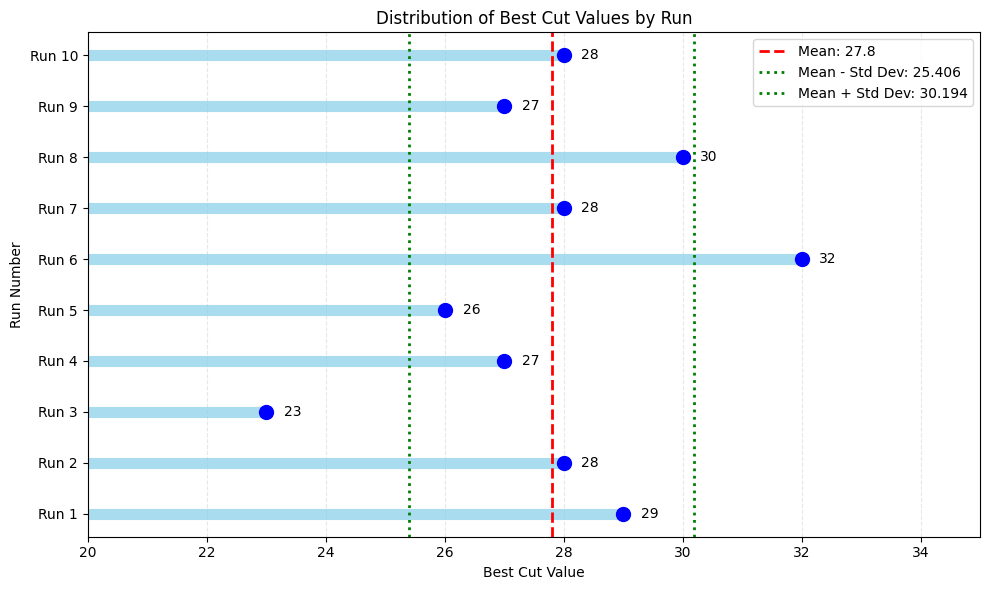

In [9]:
import matplotlib.pyplot as plt

#create stats and plots for MLS.
#LLM Prompt: calculate the mean and stdev of best cut. calculate the mean of time elapsed. round to 3 decimal places.
# Calculate statistics
mean_best_cut = df['Best Cut'].mean().round(3)
std_best_cut = df['Best Cut'].std().round(3)
mean_time_elapsed = df['Time Elapsed'].mean().round(3)

# Print the results
print(f"Best Cut: Mean = {mean_best_cut}, Std Dev = {std_best_cut}")
print(f"Time Elapsed: Mean = {mean_time_elapsed}")

#LLM Prompt: Create a plot showing the best cut distribution. mark the mean and stdev. Y axis is run number, X axis is best cut value.
# Create a plot with run numbers on y-axis and best cut on x-axis
plt.figure(figsize=(10, 6))

# Plot each run's best cut as a horizontal bar
for i, cut in enumerate(df['Best Cut']):
    plt.hlines(y=i, xmin=20, xmax=cut, color='skyblue', linewidth=8, alpha=0.7)
    plt.scatter(cut, i, color='blue', s=100, zorder=3)
    plt.text(cut+0.3, i, f"{cut}", va='center')

# Add vertical lines for mean and mean±std
plt.axvline(mean_best_cut, color='red', linestyle='dashed', linewidth=2, 
            label=f'Mean: {mean_best_cut}')
plt.axvline(mean_best_cut - std_best_cut, color='green', linestyle='dotted', linewidth=2, 
            label=f'Mean - Std Dev: {(mean_best_cut - std_best_cut):.3f}')
plt.axvline(mean_best_cut + std_best_cut, color='green', linestyle='dotted', linewidth=2, 
            label=f'Mean + Std Dev: {(mean_best_cut + std_best_cut):.3f}')

# Set y-ticks as run numbers (0-9)
plt.yticks(range(len(df)), [f"Run {i+1}" for i in range(len(df))])

# Add labels and title
plt.xlabel('Best Cut Value')
plt.ylabel('Run Number')
plt.title('Distribution of Best Cut Values by Run')
plt.grid(axis='x', alpha=0.3, linestyle='--')
plt.legend(loc='upper right')
plt.xlim(20, 35)  # Set reasonable x-axis limits
plt.tight_layout()

ILS Results.

In [10]:
import utils
from IPython.display import HTML

filename="pckl/ils_find_mutation_size/2025-03-26_02-53-50_ILS-mutation_70-runs_10-max_iterations_10000-best_cut_8.8-time_444.173.pkl"
#filename="pckl/ils_find_mutation_size/2025-03-26_01-39-48_ILS-mutation_60-runs_10-max_iterations_10000-best_cut_7.2-time_439.55.pkl"
#filename="pckl/2025-03-27_16-14-30_ILS-parallel-mutation_65-runs_10-max_iterations_10000-best_cut_9.5-time_635.893.pkl"
results = utils.load_pickle(filename)
#print(results)

filename="pckl/ils_find_mutation_size/2025-03-26_01-39-48_ILS-mutation_60-runs_10-max_iterations_10000-best_cut_7.2-time_439.55.pkl"
results_60 = utils.load_pickle(filename)

#columns = ['mutation_size', 'initial_cut', 'best_cut_size', 'time_elapsed', 'avg_cut_size', 'n_stays_in_local_optimum']
columns = ['best_cut_size', 'time_elapsed', 'n_stays_in_local_optimum']
df, html_table = utils.convert_results_to_dataframe(results, columns=columns)
df_60, html_table_60 = utils.convert_results_to_dataframe(results_60, columns=columns)
HTML(html_table)

Best Cut,Time Elapsed,Stucks in Local Optimum
2,446.810,17
9,437.065,20
9,445.580,12
8,442.682,10
9,446.642,33
9,442.561,13
12,445.427,9
6,444.544,16
12,446.317,12
12,444.104,17


Generate ILS statistics. Load the .pkl files from pckl/ils_find_mutation_size folder. Take the means of the best cut sizes and  n_stays_in_local_optima per mutation size.

Text(0.5, 1.0, 'ILS Performance vs Mutation Size')

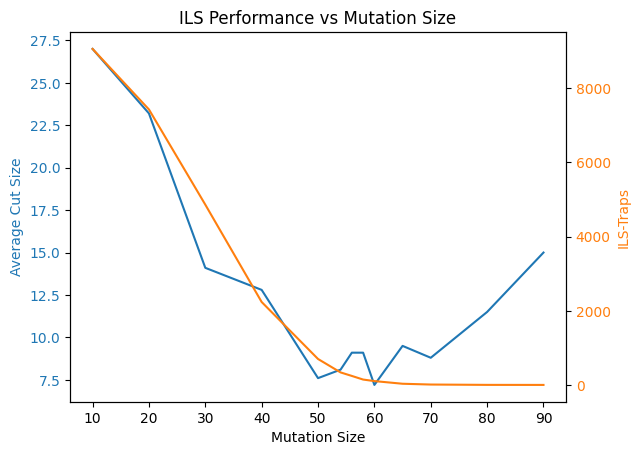

In [2]:
import matplotlib.pyplot as plt
import ils
df = ils.analyze_ils_performance('pckl/ils_find_mutation_size',additional_files=None)
fig, ax1 = plt.subplots()

#LLM Prompt: Generate a plot for ILS statistics. X axis is mutation size, Y axis is average cut size. Add another axis for the number of times the algorithm stayed in local optimum. Use different colors for each axis.
# Plot average cut size
ax1.set_xlabel('Mutation Size')
ax1.set_ylabel('Average Cut Size', color='tab:blue')
ax1.plot(df['Mutation Size'], df['Average Cut Size'], color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Plot stays in local optimum on secondary y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('ILS-Traps', color='tab:orange')
ax2.plot(df['Mutation Size'], df['Stays in Local Optimum'], color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

plt.title('ILS Performance vs Mutation Size')

Generate comparison of MLS vs. ILS and different ILS perturbations.

In [18]:
import ils
import os
from IPython.display import HTML

folder = "pckl/ils_find_mutation_size"
files = os.listdir(folder)
for i in range(len(files)):
    files[i] = os.path.join(folder, files[i])    
files = sorted(files)
files.insert(0, "pckl/2025-03-26_17-46-39_MLS-runs_10-max_iterations_10000-best_cut_27.8-time_439.552.pkl")
df = ils.compare_results(files).fillna('-')
# Remove columns ILS-[54] and ILS-[58] as they are similar to nearby mutation sizes
#df = df.drop(['MLS', 'ILS-[54]', 'ILS-[58]', 'ILS-[65]'], axis=1)
df = df.round(4)

styled_df = df.style.set_properties(**{'text-align': 'center'})
styled_df = styled_df.format(precision=4)
styled_df = styled_df.set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])            
#styled_df = styled_df.hide(axis='index')
html_table = styled_df.to_html()
HTML(html_table)

,Avg Cut Size,MLS,ILS-[10],ILS-[20],ILS-[30],ILS-[40],ILS-[50],ILS-[54],ILS-[56],ILS-[58],ILS-[60],ILS-[65],ILS-[70],ILS-[80],ILS-[90]
MLS,27.8000,1.0000,0.3053,0.1201,0.0002,0.0002,0.0002,0.0002,0.0002,0.0001,0.0002,0.0002,0.0002,0.0002,0.0002
ILS-[10],27.0000,-,1.0000,0.3423,0.0003,0.0002,0.0002,0.0002,0.0002,0.0001,0.0002,0.0002,0.0002,0.0002,0.0005
ILS-[20],23.2000,-,-,1.0000,0.0063,0.0032,0.0002,0.0002,0.0003,0.0002,0.0002,0.0003,0.0004,0.0011,0.0166
ILS-[30],14.1000,-,-,-,1.0000,0.4469,0.0011,0.0003,0.0034,0.0003,0.0006,0.0012,0.0009,0.0999,0.5374
ILS-[40],12.8000,-,-,-,-,1.0000,0.0134,0.0134,0.0625,0.0318,0.0078,0.0614,0.0520,0.5949,0.2235
ILS-[50],7.6000,-,-,-,-,-,1.0000,0.4412,0.2187,0.0617,0.8171,0.0416,0.2147,0.0146,0.0008
ILS-[54],8.1000,-,-,-,-,-,-,1.0000,0.2665,0.0587,0.3146,0.1229,0.2158,0.0087,0.0002
ILS-[56],9.1000,-,-,-,-,-,-,-,1.0000,1.0000,0.0925,0.6444,0.9693,0.0799,0.0021
ILS-[58],9.1000,-,-,-,-,-,-,-,-,1.0000,0.0198,0.4818,1.0000,0.0164,0.0002
ILS-[60],7.2000,-,-,-,-,-,-,-,-,-,1.0000,0.0413,0.1166,0.0078,0.0005


Comparison of 3 algorithms

In [76]:
import utils
import numpy as np
import pandas as pd
from IPython.display import HTML

mls_results_file = "pckl/2025-03-26_17-46-39_MLS-runs_10-max_iterations_10000-best_cut_27.8-time_439.552.pkl"
ils_results_file = "pckl/ils_find_mutation_size/2025-03-26_02-53-50_ILS-mutation_70-runs_10-max_iterations_10000-best_cut_8.8-time_444.173.pkl"
gls_results_file = "pckl/gls_results__with_pop_size50_with_iter_10000_seed[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]_20250328-221537.pkl"

run_data = utils.load_pickle(mls_results_file)[:-1] #drop the last row which is a summary
mls = pd.DataFrame(run_data)
cut_sizes_mls = list(mls['best_cut_size'])
stdev_mls = np.std(cut_sizes_mls)
mean_mls = np.mean(cut_sizes_mls)

run_data = utils.load_pickle(ils_results_file)[:-1] #drop the last row which is a summary
ils = pd.DataFrame(run_data)
cut_sizes_ils = list(ils['best_cut_size'])
stdev_ils = np.std(cut_sizes_ils)
mean_ils = np.mean(cut_sizes_ils)

gls = utils.load_pickle(gls_results_file)
cut_sizes_gls = gls['cut_sizes']
stdev_gls = np.std(cut_sizes_gls)
mean_gls = np.mean(cut_sizes_gls)

algorithms = ['MLS', 'ILS', 'GLS']
cut_sizes = [cut_sizes_mls, cut_sizes_ils, cut_sizes_gls]

data = np.full((len(algorithms), len(algorithms)), np.nan)
for i in range(len(algorithms)):
    for j in range(len(algorithms)):
        if i == j:
            data[i][j] = np.float64(1)
        else:
            data[i][j] = utils.perform_mann_whitney_u_test(cut_sizes[i], cut_sizes[j])[1]

columns = algorithms
index = algorithms
df = pd.DataFrame(data, columns=columns, index=index)
styled_df = df.style.set_properties(**{'text-align': 'center'})
styled_df = styled_df.format(precision=4)
styled_df = styled_df.set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])
html_table = styled_df.to_html()
HTML(html_table)

,MLS,ILS,GLS
MLS,1.0000,0.0002,0.0002
ILS,0.0002,1.0000,0.2492
GLS,0.0002,0.2492,1.0000


/var/folders/lm/8m47310n0sbc6d8tdlxcd8pw0000gn/T/ipykernel_95008/1129452183.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([cut_sizes_mls, cut_sizes_ils, cut_sizes_gls], labels=['MLS', 'ILS', 'GLS'])


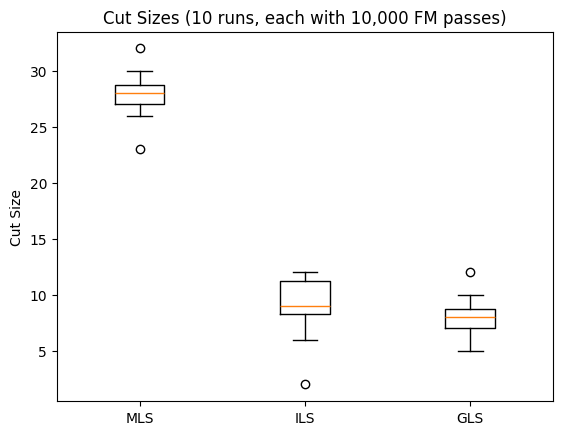

In [77]:
import matplotlib.pyplot as plt
#box plots
plt.boxplot([cut_sizes_mls, cut_sizes_ils, cut_sizes_gls], labels=['MLS', 'ILS', 'GLS'])
plt.title("Cut Sizes (10 runs, each with 10,000 FM passes)")
plt.ylabel("Cut Size")
plt.show()

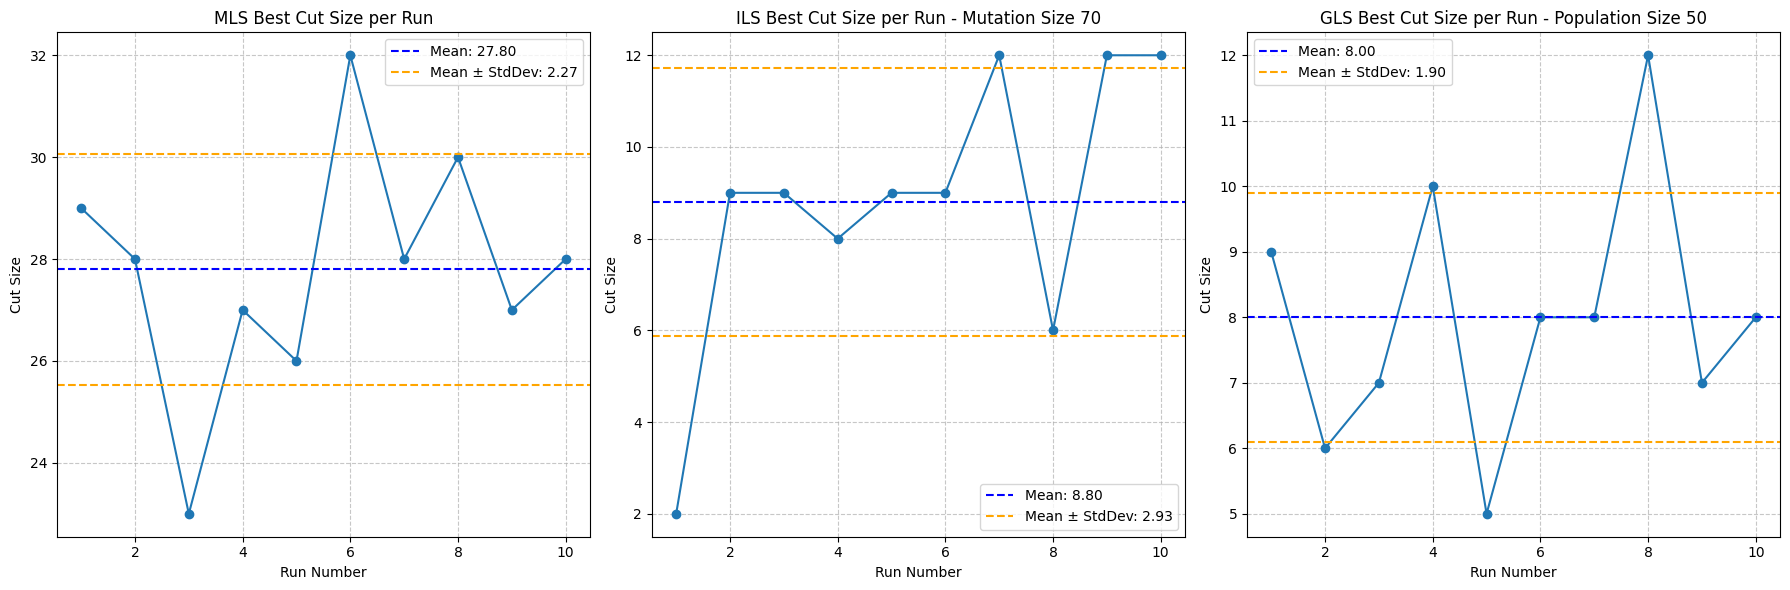

In [79]:

import matplotlib.pyplot as plt
#Create a better MLS plot.
#LLM Prompt:Given the 3 code lines below: 
# cut_sizes_mls = list(mls['Best Cut']) 
# stdev_mls = np.std(cut_sizes_mls) 
# mean_mls = np.mean(cut_sizes_mls)
# generate a line chart. x - axis is the cut size, y axis is the item index. Labels = ['Cut Size', 'Run Number']. Include stdev and mean as vertical dashed lines. color of mean line is blue, stdev is orange.

#LLM Prompt: Generate a 3 line charts. Line them up horizontally, not stacked vertically.
stdev_mls = np.std(cut_sizes_mls)
mean_mls = np.mean(cut_sizes_mls)
stdev_ils = np.std(cut_sizes_ils)
mean_ils = np.mean(cut_sizes_ils)
stdev_gls = np.std(cut_sizes_gls)
mean_gls = np.mean(cut_sizes_gls)

# Create x-axis values (run numbers/indices)
run_numbers = list(range(1, len(cut_sizes_mls) + 1))

# Create a single figure with 3 subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# MLS Plot (first subplot)
axes[0].plot(run_numbers, cut_sizes_mls, marker='o', linestyle='-')
axes[0].axhline(y=mean_mls, color='blue', linestyle='--', 
               label=f'Mean: {mean_mls:.2f}')
axes[0].axhline(y=mean_mls + stdev_mls, color='orange', linestyle='--', 
               label=f'Mean ± StdDev: {stdev_mls:.2f}')
axes[0].axhline(y=mean_mls - stdev_mls, color='orange', linestyle='--')
axes[0].set_xlabel('Run Number')
axes[0].set_ylabel('Cut Size')
axes[0].set_title('MLS Best Cut Size per Run')
axes[0].grid(True, linestyle='--', alpha=0.7)
axes[0].legend()

# ILS Plot (second subplot)
axes[1].plot(run_numbers, cut_sizes_ils, marker='o', linestyle='-')
axes[1].axhline(y=mean_ils, color='blue', linestyle='--', 
               label=f'Mean: {mean_ils:.2f}')
axes[1].axhline(y=mean_ils + stdev_ils, color='orange', linestyle='--', 
               label=f'Mean ± StdDev: {stdev_ils:.2f}')
axes[1].axhline(y=mean_ils - stdev_ils, color='orange', linestyle='--')
axes[1].set_xlabel('Run Number')
axes[1].set_ylabel('Cut Size')
axes[1].set_title('ILS Best Cut Size per Run - Mutation Size 70')
axes[1].grid(True, linestyle='--', alpha=0.7)
axes[1].legend()

# GLS Plot (third subplot)
axes[2].plot(run_numbers, cut_sizes_gls, marker='o', linestyle='-')
axes[2].axhline(y=mean_gls, color='blue', linestyle='--', 
               label=f'Mean: {mean_gls:.2f}')
axes[2].axhline(y=mean_gls + stdev_gls, color='orange', linestyle='--', 
               label=f'Mean ± StdDev: {stdev_gls:.2f}')
axes[2].axhline(y=mean_gls - stdev_gls, color='orange', linestyle='--')
axes[2].set_xlabel('Run Number')
axes[2].set_ylabel('Cut Size')
axes[2].set_title('GLS Best Cut Size per Run - Population Size 50')
axes[2].grid(True, linestyle='--', alpha=0.7)
axes[2].legend()

# Adjust layout to prevent overlap
plt.tight_layout()


Run a parameter search for adaptive ILS

In [ ]:
import ils_adaptive as ila
import warnings
warnings.filterwarnings('ignore')

#2000 iterations 86.26 seconds

operators = [30,35,40,45,50,55,60,65,70,75,80,85]
max_iterations = 2000
p_mins = [0.04,0.01,0.001,0.0001]
alphas = [0.1,0.2,0.4,0.6]
betas = [0.1,0.2,0.3,0.5]

print("Running Adaptive ILS with parameter search - parallel...")
results = ila.run_parameter_search(operators=operators, p_mins=p_mins, alphas=alphas, betas=betas, max_iterations=max_iterations)
print("Finished running Adaptive ILS with parameter search.")

Running Adaptive ILS with parameter search - parallel...


/Users/m/Documents/masterAI_offline/Evo_Comp_Assignment_2/ils_adaptive.py:78: RuntimeWarning: overflow encountered in scalar subtract
  a[1] = a[1] - self.beta * (self.p_min - a[1])
/Users/m/Documents/masterAI_offline/Evo_Comp_Assignment_2/ils_adaptive.py:78: RuntimeWarning: overflow encountered in scalar subtract
  a[1] = a[1] - self.beta * (self.p_min - a[1])
/Users/m/Documents/masterAI_offline/Evo_Comp_Assignment_2/ils_adaptive.py:78: RuntimeWarning: overflow encountered in scalar subtract
  a[1] = a[1] - self.beta * (self.p_min - a[1])
/Users/m/Documents/masterAI_offline/Evo_Comp_Assignment_2/ils_adaptive.py:78: RuntimeWarning: overflow encountered in scalar subtract
  a[1] = a[1] - self.beta * (self.p_min - a[1])
/Users/m/Documents/masterAI_offline/Evo_Comp_Assignment_2/ils_adaptive.py:78: RuntimeWarning: overflow encountered in scalar subtract
  a[1] = a[1] - self.beta * (self.p_min - a[1])
/Users/m/Documents/masterAI_offline/Evo_Comp_Assignment_2/ils_adaptive.py:78: RuntimeWarni

Finished running Adaptive ILS with parameter search.


/var/folders/lm/8m47310n0sbc6d8tdlxcd8pw0000gn/T/ipykernel_62592/388887139.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax.boxplot(cut_sizes, labels=labels)


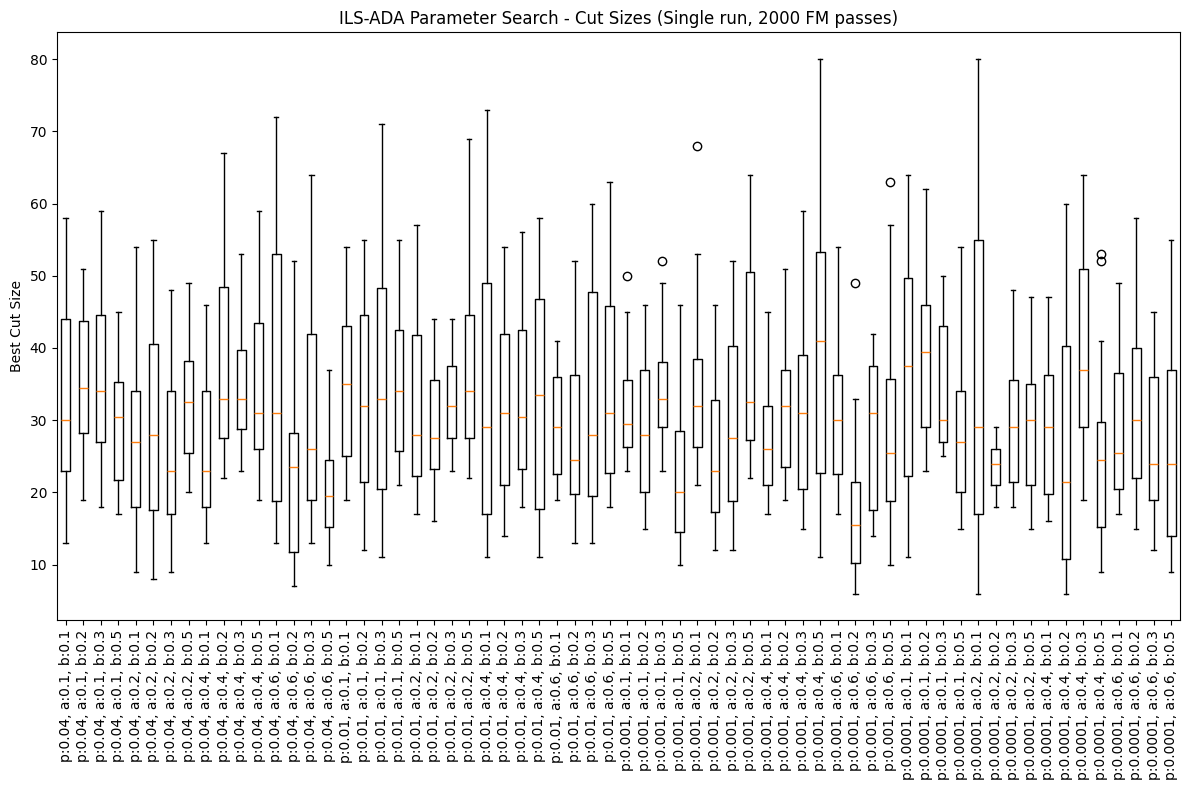

In [8]:
import utils
adares = utils.load_pickle('pckl/adaptive_strategy_research/2025-03-30_11-20-30_adaptive_ils_parameter_search_iterations-2000.pkl')

labels = []
cut_sizes = []
for test in adares:
    label = f"p:{test['p_min']}, a:{test['alpha']}, b:{test['beta']}"
    labels.append(label)
    cuts = test['sizes_cuts'][1]
    cut_sizes.append(cuts)

#box plots
fig, ax = plt.subplots(figsize=(12, 8))
bp = ax.boxplot(cut_sizes, labels=labels)
plt.title("ILS-ADA Parameter Search - Cut Sizes (Single run, 2000 FM passes)")
plt.ylabel("Best Cut Size")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Generate mutation size adaptation trend for parameter search.

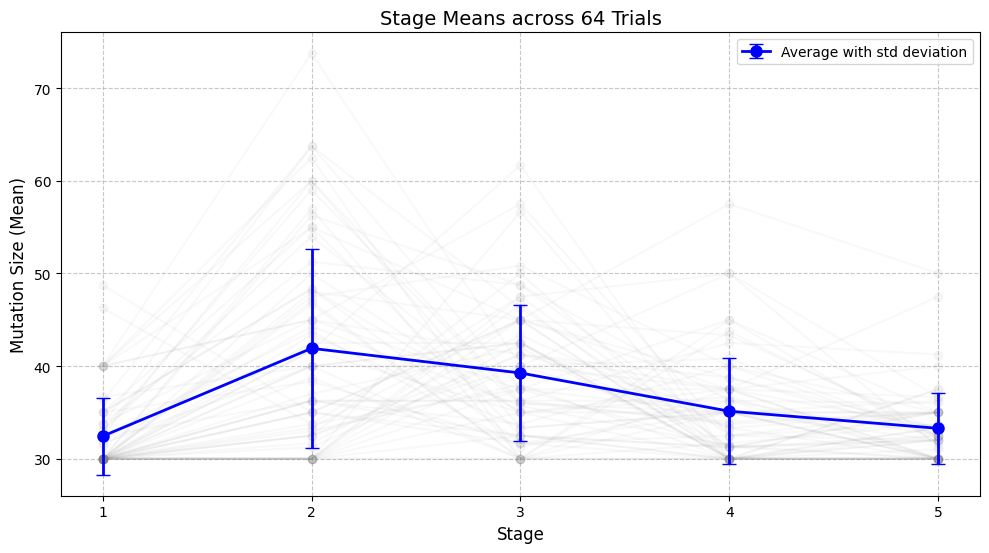

In [1]:
#Load the results from the file.
import utils
import numpy as np
from matplotlib.cm import get_cmap

filename = "pckl/adaptive_strategy_research/2025-03-30_11-20-30_adaptive_ils_parameter_search_iterations-2000.pkl"
#Result format: (p_min, alpha, beta) : (best_cut, elapsed_time, mutation_size, reward_history, operator_history, best_operator_history, a_star_history)
results_param_search = utils.load_pickle(filename)

#find unique mutation sizes and cuts
mutation_sizes = {}
best_cuts= set()
sequences = []
for item in results_param_search:
    sizes = item['sizes_cuts'][0]
    sequences.append(sizes)

phase_means = []
for se in sequences:
    means,blocks = utils.compact_to_blocks(se,5,2)    
    phase_means.append(means)

import matplotlib.pyplot as plt
import numpy as np

utils.generate_mutation_size_trend_chart(phase_means)
plt.tight_layout(rect=[0, 0.03, 1, 0.97])
plt.show()
pass

Compare ILS-ADA, MLS and ILS-STAGING results

In [5]:
import utils
import pandas as pd
import numpy as np

mls_results_file = "pckl/final_results/2025-03-31_17-58-36_MLS-runs_1-max_iterations_10000-best_cut_26-time_469.947.pkl"
ils_ada_results_file = "pckl/final_results/2025-03-31_16-56-44_ILS-ADA-10000-p0.001_a0.6_b0.2_sFalse-best_cut_29-time_419.293.pkl"
ils_ada_staging_file = "pckl/final_results/2025-03-31_16-56-05_ILS-ADA-STAGING-10000-p0.001_a0.6_b0.2_sTrue-st0.6-st30-best_cut_10-time_425.04.pkl"
ils_results_file = "pckl/final_results/2025-03-31_16-37-48_ILS-10000-mutation_70-best_cut_9-time_449.797.pkl"

#load the MLS results
mls_data = utils.load_pickle(mls_results_file) 
mls_stats = mls_data[-1]
mls_data = mls_data[:-1] #drop the last row which is a summary

mls = pd.DataFrame(mls_data)
cut_sizes_mls = list(mls['best_cut_size'])
stdev_mls = np.std(cut_sizes_mls)
mean_mls = np.mean(cut_sizes_mls)
mls_best = mls_stats['best_cut']
mls_median = np.median(cut_sizes_mls)

#load the ILS-ADA results
ils_ada = utils.load_pickle(ils_ada_results_file)[0] #this is a single run 
cut_sizes_ils_ada = ils_ada['best_cuts']
stdev_ils_ada = np.std(cut_sizes_ils_ada)
mean_ils_ada = np.mean(cut_sizes_ils_ada)
ils_ada_best = max(cut_sizes_ils_ada)
ils_ada_median = np.median(cut_sizes_ils_ada)

pass


KeyboardInterrupt: 

Generate final tables and box plots.

/var/folders/lm/8m47310n0sbc6d8tdlxcd8pw0000gn/T/ipykernel_48057/68970451.py:63: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(cut_sizes, labels=['MLS','ILS-ADA','ILS', 'GLS'])


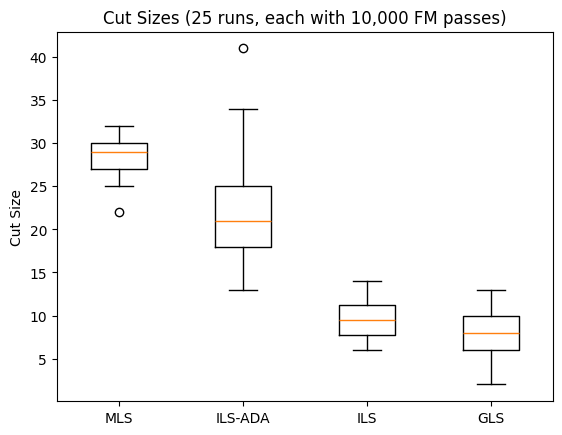

In [2]:
import utils
import numpy as np
import pandas as pd
from IPython.display import HTML
import matplotlib.pyplot as plt
import ils_adaptive as ila

mls_results_file = "pckl/2025-03-30_18-51-12_MLS-runs_25-max_iterations_10000-best_cut_28.24-time_463.452.pkl"
ils_results_file = "pckl/2025-03-30_18-38-51_ILS-25-mutation_70-runs_25-max_iterations_10000-best_cut_9.44-time_459.134.pkl"
gls_results_file = "pckl/20250330-184058_GLS-runs_25-pop_size_50-iter_10000.pkl"

#load the MLS results
mls_data = utils.load_pickle(mls_results_file) 
mls_stats = mls_data[-1]
mls_data = mls_data[:-1] #drop the last row which is a summary

mls = pd.DataFrame(mls_data)
cut_sizes_mls = list(mls['best_cut_size'])
stdev_mls = np.std(cut_sizes_mls)
mean_mls = np.mean(cut_sizes_mls)
mls_best = mls_stats['best_cut']
mls_median = np.median(cut_sizes_mls)

#load the ILS results
ils_data = utils.load_pickle(ils_results_file)[:-1] 
ils_stats = ils_data[-1]
ils_data = ils_data[:-1] #drop the last row which is a summary

ils = pd.DataFrame(ils_data)
cut_sizes_ils = list(ils['best_cut_size'])
stdev_ils = np.std(cut_sizes_ils)
mean_ils = np.mean(cut_sizes_ils)
ils_best = ils_stats['best_cut_size']
ils_median = np.median(cut_sizes_ils)

#load the ILS-ADA results
ilsa_data = ila._load_results_from_folder("pckl/ils-ada-25")
ils_ada_stats = ilsa_data[-1]
ilsa_data = ilsa_data[:-1] #drop the last row which is a summary
rows = []
for i in range(len(ilsa_data)):
    rows.append(ilsa_data[i][0])
ils_ada = pd.DataFrame(rows)

#{'p_min': 0.0001, 'alpha': 0.4, 'beta': 0.2, 'use_stage_weights': False}
cut_sizes_ils_ada = list(ils_ada['best_cut_size'])
stdev_ils_ada = np.std(cut_sizes_ils_ada)
mean_ils_ada = np.mean(cut_sizes_ils_ada)
ils_ada_best = ils_ada_stats[0]['best_cut_size']
ils_ada_median = np.median(cut_sizes_ils_ada)

#load the GLS results
gls = utils.load_pickle(gls_results_file)
cut_sizes_gls = gls['cut_sizes']
stdev_gls = np.std(cut_sizes_gls)
mean_gls = np.mean(cut_sizes_gls)
gls_best = min(cut_sizes_gls)
gls_median = np.median(cut_sizes_gls)
algorithms = ['MLS','ILS-ADA', 'ILS', 'GLS']
cut_sizes = [cut_sizes_mls, cut_sizes_ils_ada, cut_sizes_ils, cut_sizes_gls]

#box plots
plt.boxplot(cut_sizes, labels=['MLS','ILS-ADA','ILS', 'GLS'])
plt.title("Cut Sizes (25 runs, each with 10,000 FM passes)")
plt.ylabel("Cut Size")
plt.show()


In [3]:
#Perform the statistical tests. You need to run the previous code block to get the cut sizes.
data = np.full((len(algorithms), len(algorithms)), np.nan)
for i in range(len(algorithms)):
    for j in range(len(algorithms)):
        if i == j:
            data[i][j] = np.float64(1)
        else:
            data[i][j] = utils.perform_mann_whitney_u_test(cut_sizes[i], cut_sizes[j])[1]

columns = algorithms
index = algorithms
df = pd.DataFrame(data, columns=columns, index=index)
styled_df = df.style.set_properties(**{'text-align': 'center'})
styled_df = styled_df.format(precision=4)
styled_df = styled_df.set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])
html_table = styled_df.to_html()
HTML(html_table)

,MLS,ILS-ADA,ILS,GLS
MLS,1.0000,0.0000,0.0000,0.0000
ILS-ADA,0.0000,1.0000,0.0000,0.0000
ILS,0.0000,0.0000,1.0000,0.0581
GLS,0.0000,0.0000,0.0581,1.0000


In [4]:
#Generate the results table.
columns = ['Algorithm', 'Best Cut', 'Mean', 'Median', 'Std Dev']
res_data = []
res_data.append(['MLS', mls_best, mean_mls, mls_median, stdev_mls])
res_data.append(['ILS', ils_best, mean_ils, ils_median, stdev_ils])
res_data.append(['ILS-ADA', ils_ada_best, mean_ils_ada, ils_ada_median, stdev_ils_ada])
res_data.append(['GLS', gls_best, mean_gls, gls_median, stdev_gls])
df = pd.DataFrame(res_data, columns=columns)
styled_df = df.style.set_properties(**{'text-align': 'center'})
styled_df = styled_df.format(precision=2)
styled_df = styled_df.set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])
styled_df = styled_df.hide(axis='index')
html_table = styled_df.to_html()
HTML(html_table)

Algorithm,Best Cut,Mean,Median,Std Dev
MLS,22,28.24,29.00,2.39
ILS,8,9.50,9.50,2.31
ILS-ADA,26,21.96,21.00,5.88
GLS,2,8.00,8.00,2.43
